# Analyse du corpus B (Le Vingtième Siècle 1890-1940)

Le corpus B correspond au fichier "txt2"

### Imports

In [2]:
import os
import textract

In [3]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/laure-
[nltk_data]     annemassart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vérifications diverses

In [5]:
txt2_path = '../data/txt2'

txts = []
for f in os.listdir(txt2_path):
    if os.path.isfile(os.path.join(txt2_path, f)):
        txts.append(f)
txts[:10]

['KB_JB729_1933-04-21_01-00008.txt',
 'KB_JB729_1913-04-23_01-00004.txt',
 'KB_JB729_1903-09-02_01-00003.txt',
 'KB_JB729_1933-04-26_01-00008.txt',
 'KB_JB729_1911-11-19_01-00002.txt',
 'KB_JB729_1908-05-01_01-00002.txt',
 'KB_JB729_1925-11-05_01-00002.txt',
 'KB_JB729_1938-11-03_01-00004.txt',
 'KB_JB729_1923-04-15_01-00004.txt',
 'KB_JB729_1925-05-01_01-00001.txt']

In [6]:
path = "../data/txt2/"
files = sorted(os.listdir(path))
len(files)

501

### Visualiser le nombre de documents par mois

In [7]:
all_years = [str(year) for year in range(1887, 1971)]

In [8]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

count_decade

Anomalous file: .DS_Store


defaultdict(int,
            {'1890s': 44, '1900s': 75, '1910s': 88, '1920s': 214, '1930s': 79})

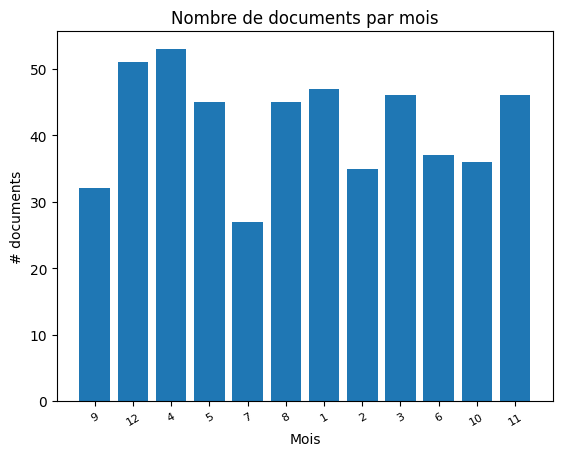

In [9]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Fréquence des mots du corpus

In [10]:
!cat ../data/txt2/*.txt > ../data/txt2_all.txt

Paramétrage des stopwords

In [54]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "bruxelles", "rue", "pays", "centimes", 
       "sables", "vente", "heures", "grand", "leurs", "jour", "très", "peu", "quelques", "toutes",
       "elles", "temps", "an", "ans", "toute", "elles", "temps", "belgique", "saint", "vie", "grande", "point", "quand", "très",
       "fois", "question", "mois", "lieu", "ceux", "rien", "toujours", "mme", "avant", "hui", "chez",
       "celui", "déjà", "aujourd", "belge", "vient", "jours", "soir", "vers"]
sw = set(sw)

In [55]:
path = "../data/txt2_all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [56]:
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

3813847 words found


In [57]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1331264 words kept (177726 different word forms)


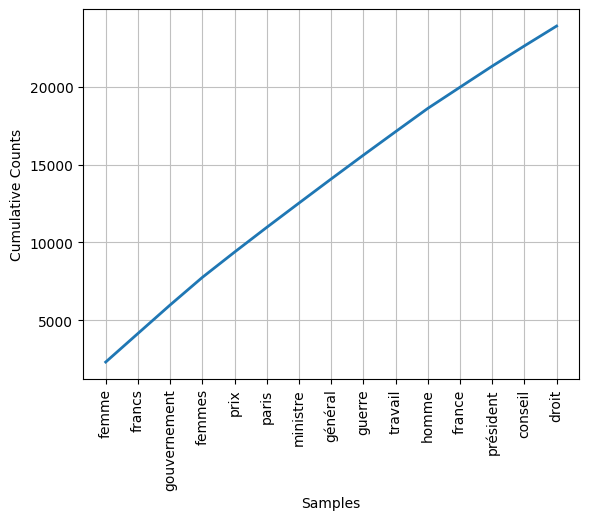

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [58]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

n = 15
fdist.plot(n, cumulative=True)

### Keywords

In [60]:
import os
import yake

In [61]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

Extraire les mots-clés

In [62]:
keywords = kw_extractor.extract_keywords(text)
keywords

Extraire les bigrammes

In [ ]:
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

["c'est qu'il",
 'Mlle Van',
 "qu'il faut",
 'Mme Van',
 'Congo belge',
 'gouvernement belge',
 "cours d'une",
 'jeune fille',
 'jeunes filles']

### Sentiment analysis

In [1]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [2]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [3]:
get_sentiment("Laissons à chacun sa sphère d'action : la femme au foyer, le mari au forum.")

This text is neutral and perfectly objective.


In [4]:
get_sentiment("Toutefois, en vue de priver du droit de suffrage les négresses ignorantes et pour consolider l'influence de la population blanche dans les Antilles anglaises, le législateur bermudais a subordonné l'exercice du suffrage féminin à des conditions de capacité ou de propriété. Seules, les femmes propriétaires ou capacitaires posséderont le bulletin de vote.")

This text is 5% positive and 0.08333333333333333% subjective.


### Word embeddings

In [5]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [6]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [7]:
infile = f"../data/txt2_all.txt"
sentences = MySentences(infile)

In [8]:
bigram_phrases = Phrases(sentences)
bigram_phraser = Phraser(phrases_model=bigram_phrases)

trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [9]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [16]:
%%time
model = Word2Vec(
    corpus, 
    vector_size=32, 
    window=15,
    min_count=1,
    workers=5, 
    epochs=5 
)

CPU times: user 4.51 s, sys: 191 ms, total: 4.71 s
Wall time: 4.87 s


In [17]:
outfile = f"../data/txt2.model"
model.save(outfile)

model = Word2Vec.load("../data/txt2.model")

In [18]:
model.wv.similarity("femme", "feministe")

-0.014431402

In [19]:
model.wv.most_similar("femme", topn=50)

[('importuns', 0.6981754899024963),
 ('declamation', 0.6762075424194336),
 ('ieajite', 0.667377233505249),
 ('rendra_compte', 0.66385418176651),
 ('buer', 0.6490710377693176),
 ('daa', 0.6445857286453247),
 ('1989', 0.6422110795974731),
 ('jouglet', 0.6334922313690186),
 ('on_constate', 0.6307874321937561),
 ('ratline', 0.6279908418655396),
 ('elisabethviihe', 0.6230916976928711),
 ('cnburg', 0.6214374303817749),
 ('sgin', 0.621060311794281),
 ('touches', 0.619536817073822),
 ('gnature', 0.6189436316490173),
 ('mafin', 0.6152539253234863),
 ('paulette', 0.614209771156311),
 ('plajis', 0.6094908714294434),
 ('ephemeride', 0.6094379425048828),
 ('fameliques', 0.6093229651451111),
 ('iieer', 0.6082315444946289),
 ('aivez', 0.6033164262771606),
 ('exaspere', 0.6029044985771179),
 ('leyds', 0.6017652153968811),
 ('lachambre', 0.6006029844284058),
 ('seivi', 0.5997408628463745),
 ('pohoska', 0.5985819101333618),
 ('paoletti', 0.5968204736709595),
 ('moss', 0.5954824090003967),
 ('scaphandre'